In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.test_model_cesm, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for CESM1-1-CAM5-CMIP5: ['/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r21i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r23i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r33i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r11i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/nor

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data values:  [[[-2.88593750e+01 -3.30859375e+01 -4.00859375e+01 ... -9.45781250e+01
   -8.23828125e+01 -7.88671875e+01]
  [-2.58593750e+01 -3.74453125e+01 -4.52734375e+01 ... -1.00015625e+02
   -9.10703125e+01 -8.00234375e+01]
  [-2.39921875e+01 -3.90312500e+01 -5.01328125e+01 ... -1.03421875e+02
   -9.68281250e+01 -8.45390625e+01]
  ...
  [ 6.10468750e+01  6.16250000e+01  6.44296875e+01 ...  6.35398438e+02
    6.55898438e+02  6.72859375e+02]
  [ 5.31406250e+01  5.13203125e+01  5.64453125e+01 ...  6.55171875e+02
    6.72960938e+02  6.87375000e+02]
  [ 3.92656250e+01  4.63828125e+01  3.88515625e+01 ...  6.41335938e+02
    6.57054688e+02  6.70742188e+02]]

 [[-4.85156250e+01 -4.62734375e+01 -4.83437500e+01 ... -2.26015625e+01
   -2.54062500e+01 -2.80703125e+01]
  [-5.58437500e+01 -6.12968750e+01 -6.19687500e+01 ... -3.26640625e+01
   -3.58203125e+01 -3.30078125e+01]
  [-7.62031250e+01 -7.89531250e+01 -7.86953125e+01 ... -4.23046875e+01
   -4.5109375

In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid, 
                               forecast_range, season, obs_path, obs_var_name)

Region grid dimensions: {'lon1': 280, 'lon2': 37.5, 'lat1': 77.5, 'lat2': 20}
Forecast range: 2 - 9
Rolling mean range: 8


/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [8]:
# # check the values of obs
obs["var151"]

# count how many value are NaN
nan_count = np.isnan(obs["var151"]).sum()

print(nan_count.values)

# count how many values are not NaN
not_nan_count = np.count_nonzero(obs["var151"])

print(not_nan_count)

# calculate the percentage of NaN values
nan_percentage = nan_count / (nan_count + not_nan_count) * 100

# print the percentage of NaN values
print("Percentage of NaN values in obs: ", nan_percentage)

8064
72576
Percentage of NaN values in obs:  <xarray.DataArray 'var151' ()>
dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


In [9]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>

Observations dimensions: Frozen({'time': 63, 'lon': 48, 'lat': 24})
Observations variables: <xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>
Observations latitude values: [77.5 75.  72.5 70.  67.5 65.  62.5 60.  57.5 55.  52.5 50.  47.5 45.
 42.5 40.  37.5 35.  32.5 30.  27.5 25.  22.5 20. ]
Observations longitude values: [  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5]
Observations variable: [[n

/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


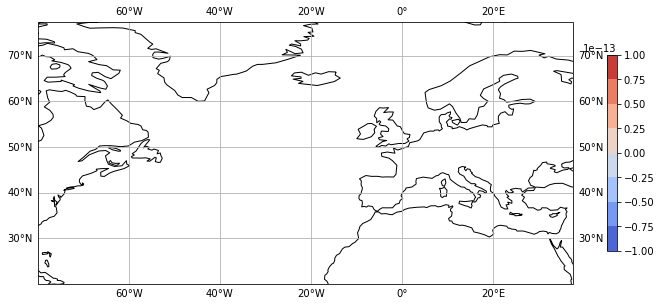

In [10]:
# # Attempt to plot the data
fnc.plot_obs_data(obs)

In [11]:
print(type(variable_data))

<class 'dict'>


In [12]:
# fnc.plot_model_data(variable_data, dic.test_model, dic.gif_plots_dir)

In [13]:
# print((np.shape(variable_data['NorCPM1'])))

In [20]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>

In [15]:
print(type(dic.test_model_norcpm))

<class 'list'>


In [16]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.test_model_cesm)

extracting data for model: CESM1-1-CAM5-CMIP5
trying to print values for each member for debugging
values for model: CESM1-1-CAM5-CMIP5
values for members: <xarray.DataArray 'psl' (time: 58, lat: 24, lon: 48)>
dask.array<open_dataset-cfe951d2ea421739b74f10fd13c9ed82psl, shape=(58, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-07-31 00:00:00 ... 2022-07-31 00:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    comment:        PSL
    description:    not, in general, the same as surface pressure
    frequency:      mon
    id:             psl
    mipTable:       Amon
    out_name:       psl
    prov:     

[[-0.50614834 -0.49419282 -0.50773267 ...  0.25483739  0.25502297
   0.29748315]
 [-0.45483617 -0.47753466 -0.47839887 ...  0.24016377  0.22498213
   0.3014461 ]
 [-0.41387109 -0.43434207 -0.45049519 ...  0.21649605  0.20538649
   0.25974779]
 ...
 [-0.09575003 -0.0586805  -0.05908664 ... -0.52784294 -0.51993797
  -0.5026722 ]
 [-0.04278273 -0.10801006 -0.13128032 ... -0.50584725 -0.47533342
  -0.46306926]
 [ 0.06771579  0.02692021 -0.07397725 ... -0.41897219 -0.41124605
  -0.41041013]]


(array([[0., 0., 2., 4., 4., 2., 2., 0., 3., 2., 2., 2., 0., 1., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 1., 6., 3., 1., 1., 3., 1., 3., 2., 1., 1., 1., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 1., 5., 3., 2., 0., 2., 4., 3., 2., 0., 2., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 5., 4., 1., 2., 3., 1., 4., 2., 1., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 5., 3., 5., 1., 1., 2., 1., 4., 1., 0., 1., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 3., 2., 7., 2., 1., 2., 2., 2., 1., 1., 1., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 2., 4., 3., 5., 0., 2., 2., 3., 1., 2., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 2., 4., 2., 4., 3., 2., 1., 1., 4., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 3., 3., 2., 3., 3., 3., 1., 1., 4., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 3., 3., 1., 2., 4., 2., 2., 1., 4., 2., 0., 0., 0.,
         0., 0., 0., 0.],
        [0

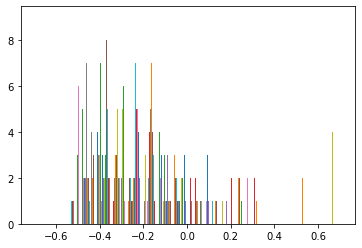

In [17]:
# print the rfield
print(rfield)
# visualise the distribution of r values
# as a histogram
plt.hist(rfield, bins=20)

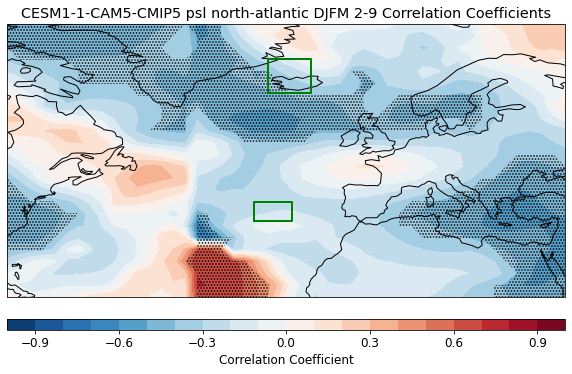

In [18]:
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.test_model_cesm, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)

Processing model: BCC-CSM2-MR


KeyError: 'BCC-CSM2-MR'

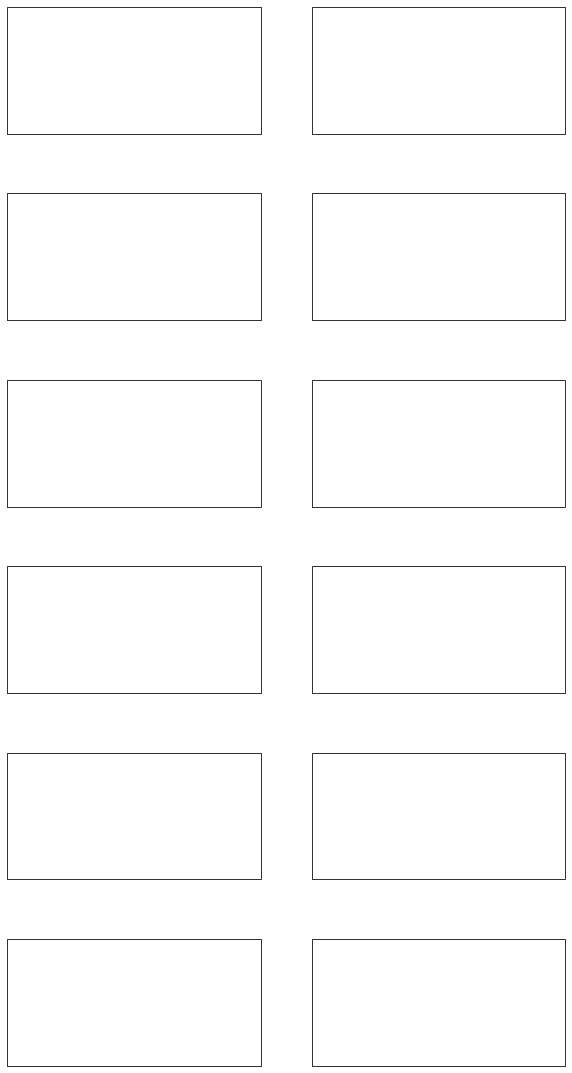

In [19]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid)